# Optimising User Engagement for APP Subscription Conversion


In [117]:
#Import Libraries

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import seaborn as sn
from dateutil import parser
import time

import pickle
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [118]:
# Read the dataset
app_subscription_df = pd.read_csv("customers_subscription.csv")
app_subscription_df.head(5)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [119]:
app_subscription_df.shape

(50000, 12)

# EDA 

In [120]:
# Distribution of numerical columns
app_subscription_df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


.Here we can see that average age of user is around 32.

.On an average, user visits 21 screens, also 10% of user plays minigame, 16% of users liked
 features of app, 17% of user used premium features of app & 62% enrolled to premium

In [121]:
# check the data types
app_subscription_df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [122]:
app_subscription_df.isna().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [123]:
# Data Cleaning #

'Hour' column is originally stored as an object(likely a string) and we are converting it to an integer and using 'str.extract' function to extract only the hour part(digits from the 'hour column')

In [124]:
app_subscription_df['hour'] = app_subscription_df['hour'].str.extract('(\d+)').astype(int)

In [125]:

##app_subscription_df["hour"] = app_subscription_df.hour.str.slice(1, 3).astype(int)

In [126]:
app_subscription_df["hour"]

0         2
1         1
2        19
3        16
4        18
         ..
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int64

In [127]:
# Display the modified Dataframe
app_subscription_df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [128]:
app_subscription_df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

# Plotting

creating a new dataset from the existing one where we are dropping the columns which we think are unnecessary.

In [129]:
app_subscription2_df = app_subscription_df.copy().drop(columns = ['user', 'screen_list', 'enrolled_date','first_open', 'enrolled'])

In [130]:
app_subscription2_df.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


# Plot Histograms for the Remaining Columns

Let's Plot the Histogram for all numerical columns to know the disribution of these features

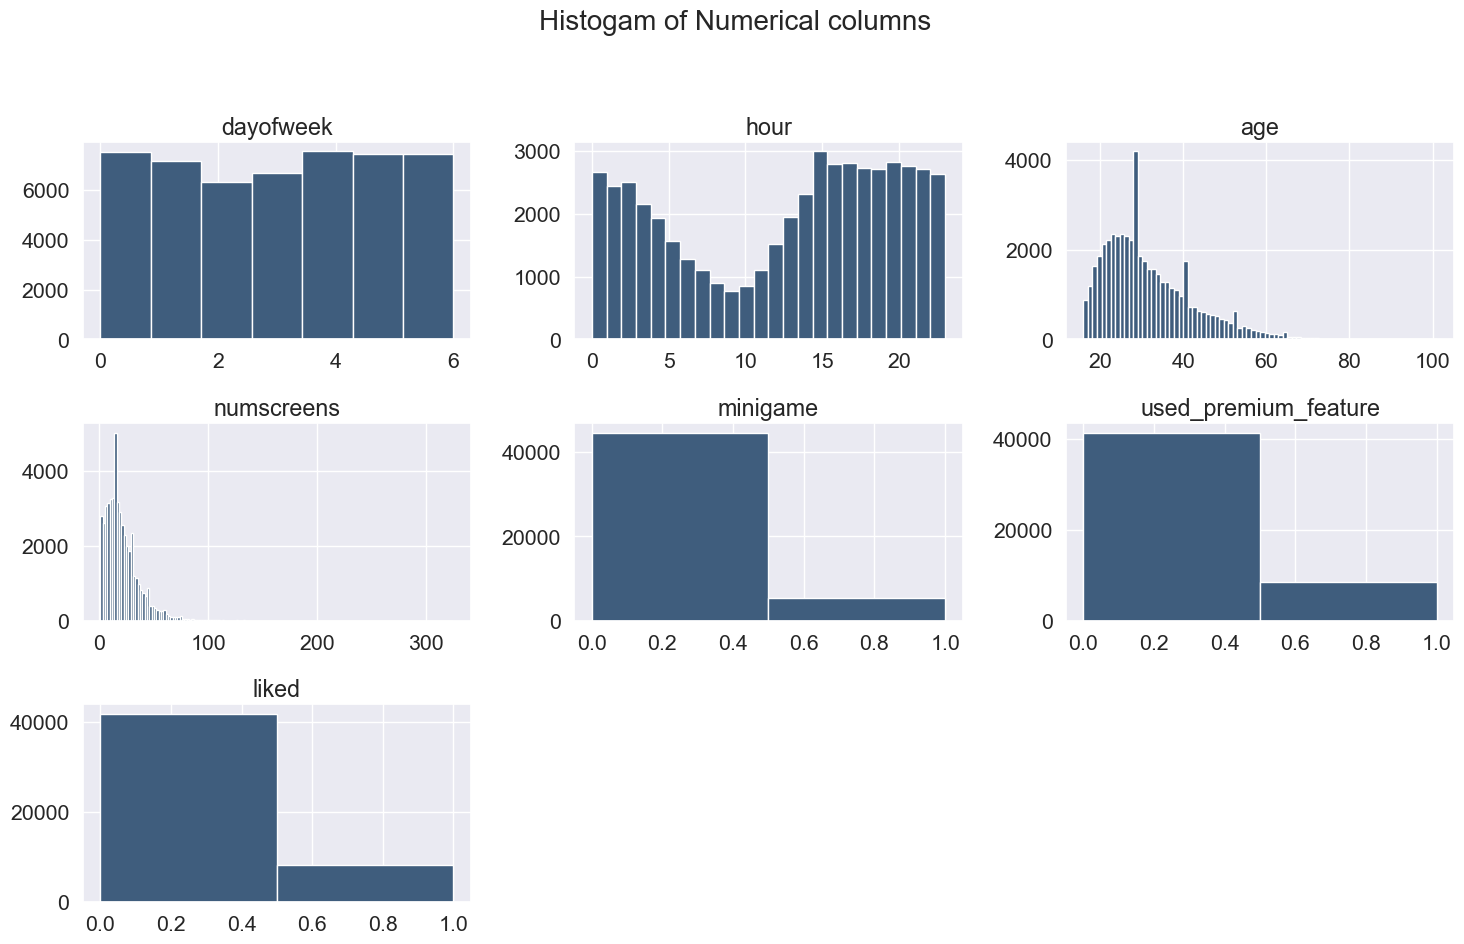

In [131]:
# Let's Plot Histogram for all numerical columns to know the disribution of these features
plt.figure(figsize=(15,10))
plt.suptitle('Histogam of Numerical columns', fontsize= 20)
for i in range(1, app_subscription2_df.shape[1] + 1):
    plt.subplot(3,3,i)
    f = plt.gca()
#f.axes.get_yaxis().set_visible(False)
    f.set_title(app_subscription2_df.columns.values[i-1])
    
    vals = np.size(app_subscription2_df.iloc[:,i-1].unique())
    
    plt.hist(app_subscription2_df.iloc[:,i-1], bins = vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#plt.savefig('app_data_hist.jpg')

Observations:

. Most of the users join app during weekends

. Most of the users 1st open the app around 15 that is around 3PM

. Most of users are aged around 30 Years

. Most of users visited around 20 screens of app

. Not many users played any minigames

. Not many users press the like button

. Not many user used premium feature in 1st 24 hours

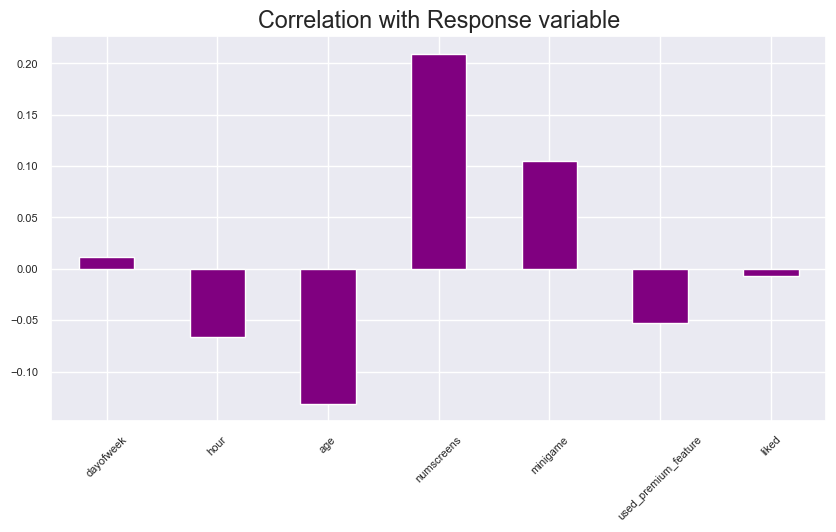

In [132]:
## Let's see the Correlation between independent features & response variable
app_subscription2_df.corrwith(app_subscription_df.enrolled).plot.bar(figsize=(10,5),
                  title = 'Correlation with Response variable',
                  fontsize = 8, rot = 45,
                  grid = True, color='purple')
# Save the plot as an image with smaller size
#plt.savefig('correlation_plot.jpg', bbox_inches='tight', dpi=150)  # Adjust dpi as needed
#plt.show()
plt.savefig('app_data_corr.jpg')

### Observations:

dayofweek is least positively correlated & says that if you join the app in day 0(sunday) then their is most likely to get enrolled to the premium features

Hour is negatively correlated with target variable shows the earlier the hour(in night) the most likely to get enrolled

age is also negatively correlated reflects that the younger users are most likely to get enrolled

Numscreen is positively correlated with target shows that more the no. of screen user visits more chances of getting enrolled

minigame also shows that more the minigame user play more chances of getting enrolled

liked is very least negative which does not have much impact in target

interestingly used_premium_feature is negatively correlated with response meaning that if user used the premium feature in 1st 24 hour that he/she might not enroll after the trial version of premium features

In [133]:
## Correlation Matrix
sn.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = app_subscription2_df.corr()

In [134]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

<AxesSubplot:>

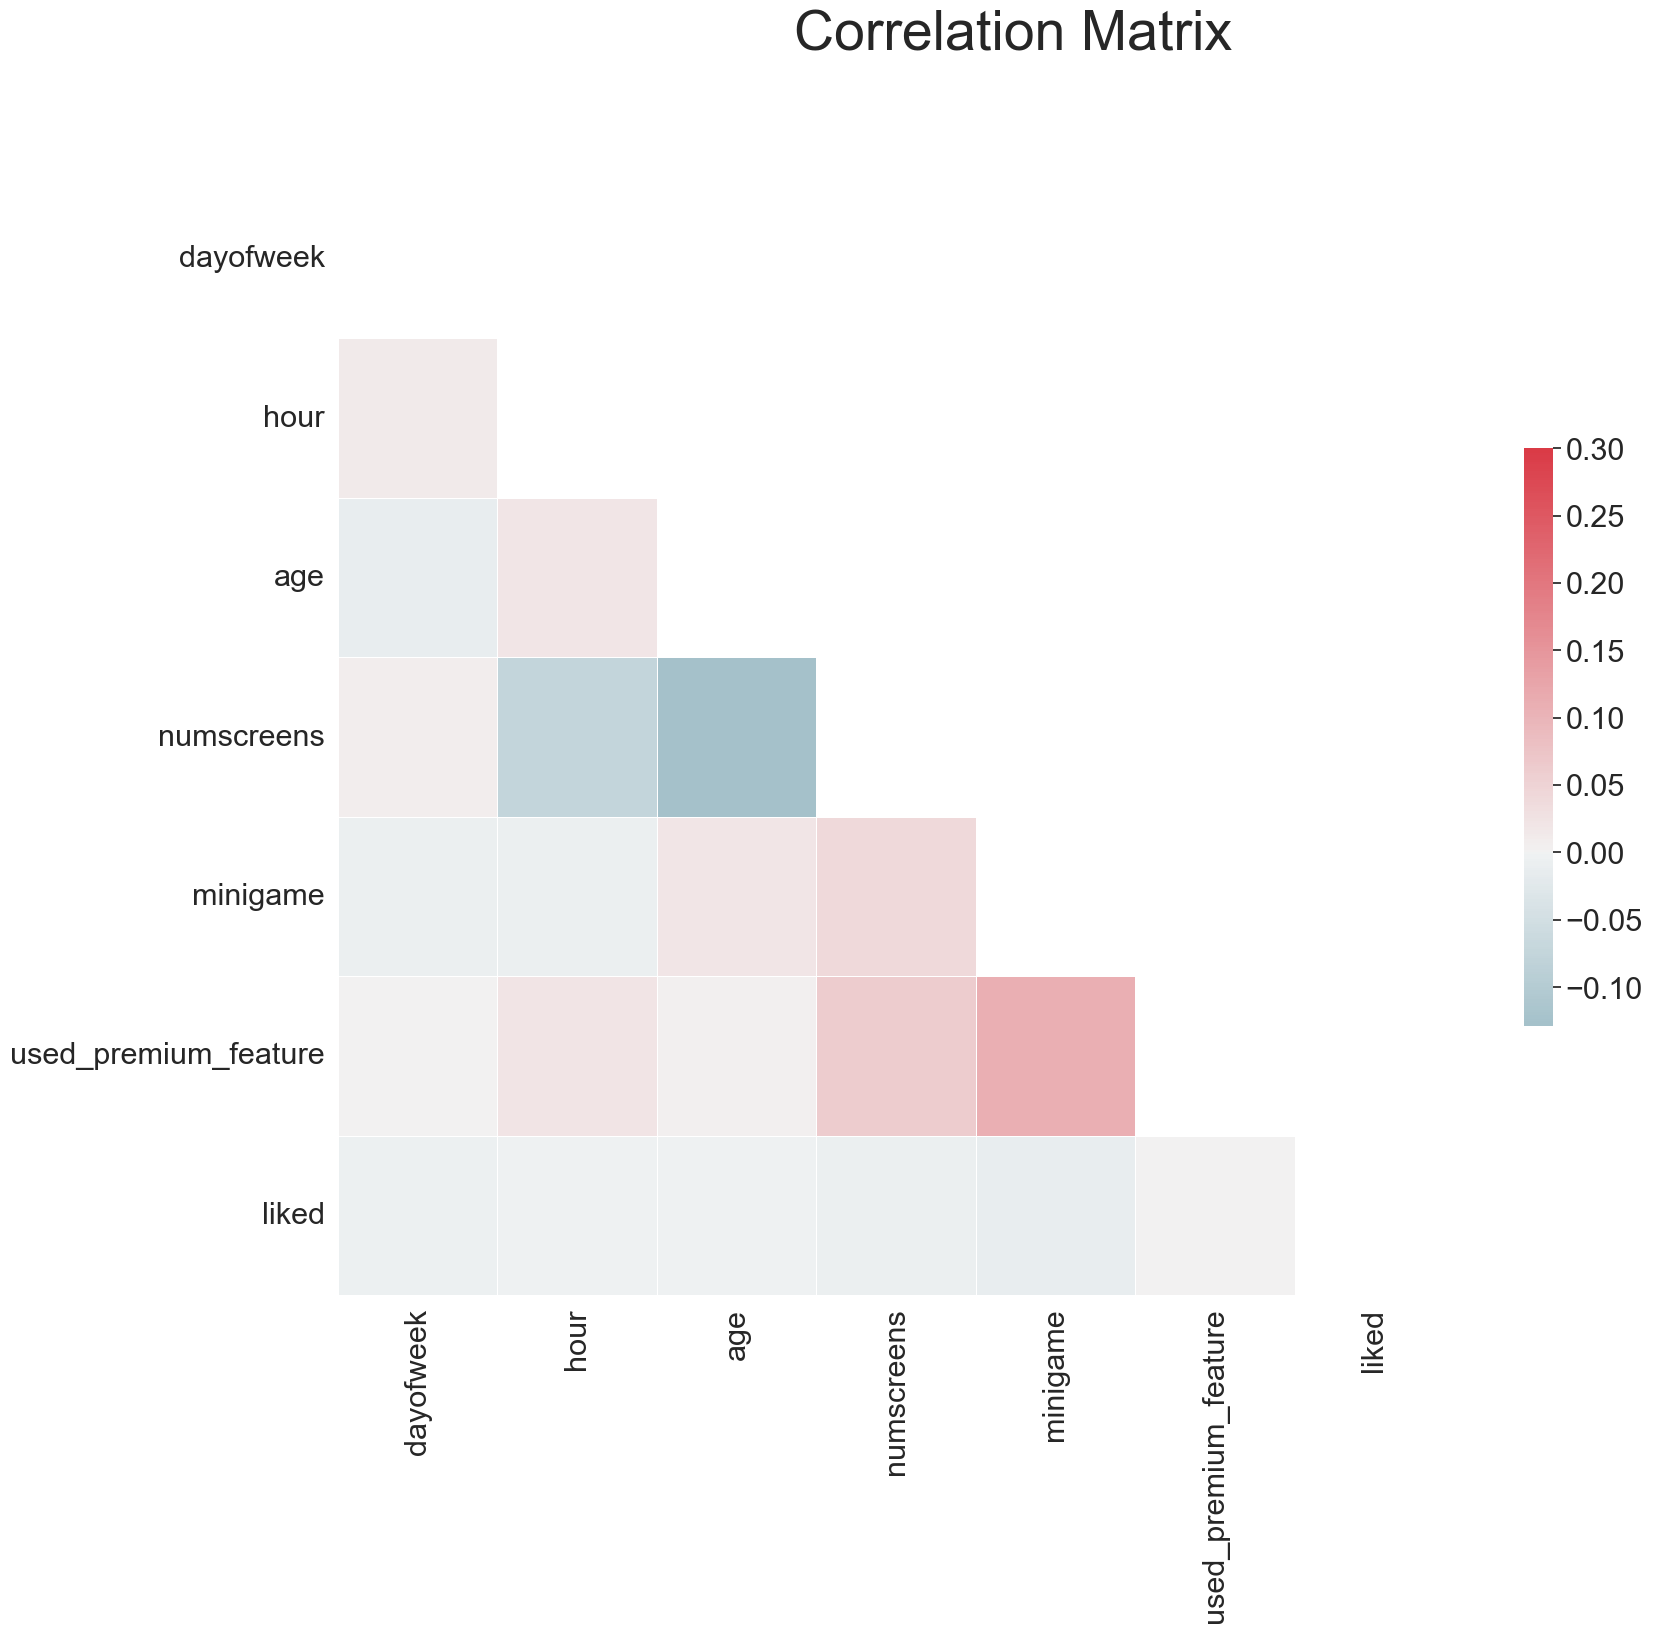

In [135]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

All the independent features are having very less correlation among themselves, so their is very less chance of multicollinearity problem

# Feature Engineering - Response Variable

In [136]:
app_subscription_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  int64 
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 4.6+ MB


In [137]:
#Here we need to plot the difference between first_open and enrolled_date in hours
# Lets start looking at the datatypes

In [138]:
# Formatting Date Columns
app_subscription_df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [139]:
app_subscription_df.isna().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [140]:
#Here we can see datatype of these two fieds are object so we need to convert it to datetime so that we can get the exact difference.

In [141]:
app_subscription_df["first_open"] = [parser.parse(row_data) for row_data in app_subscription_df["first_open"]]
app_subscription_df["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in app_subscription_df["enrolled_date"]]

In [142]:
# Formatting Date Columns
app_subscription_df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [143]:
app_subscription_df.head() 


,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


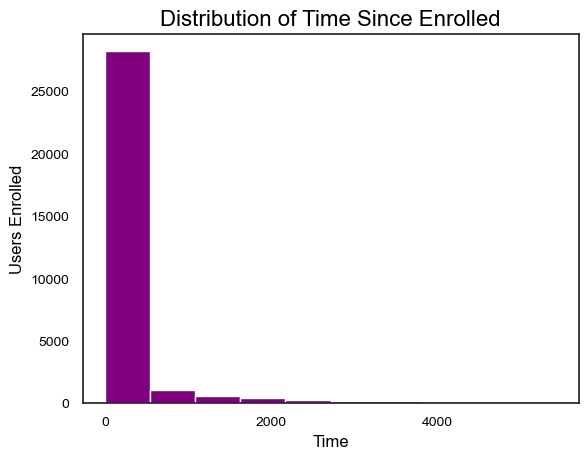

In [144]:
# Selecting Time For Response
app_subscription_df["difference"] = (app_subscription_df.enrolled_date - app_subscription_df.first_open).dt.total_seconds() / 3600  # Convert to hours
plt.hist(app_subscription_df["difference"].dropna(), color='purple')
plt.title('Distribution of Time Since Enrolled',fontsize=16, color='black')
plt.xlabel('Time', fontsize=12, color='black')
plt.ylabel('Users Enrolled', fontsize=12, color='black')
# Change font and color of x and y tick labels
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
#plt.savefig('time_distribution_plot1.jpg')
plt.show()


Here we observe that most of users enrolled in 1st 2000 Hour but their might be case that most enrollment is in 1st 100 or 500 hours, lets zoom the plot

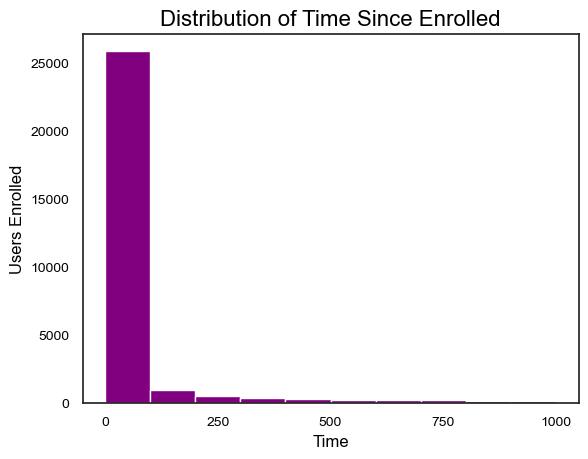

In [145]:
plt.hist(app_subscription_df["difference"].dropna(), color='purple', range =[0,1000])
plt.title('Distribution of Time Since Enrolled',fontsize=16, color='black')
plt.xlabel('Time', fontsize=12, color='black')
plt.ylabel('Users Enrolled', fontsize=12, color='black')
# Change font and color of x and y tick labels
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
#plt.savefig('time_distribution_plot2.jpg')
plt.show()


Here we observe that most of users enrolled in 1st 100 Hour but let's zoom the plot again

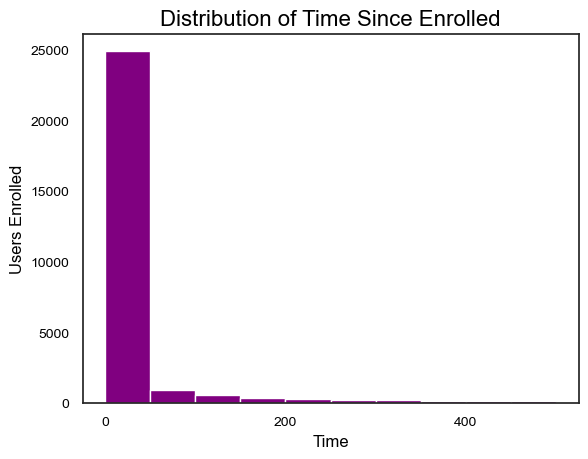

In [146]:
plt.hist(app_subscription_df["difference"].dropna(), color='purple', range =[0,500])
plt.title('Distribution of Time Since Enrolled',fontsize=16, color='black')
plt.xlabel('Time', fontsize=12, color='black')
plt.ylabel('Users Enrolled', fontsize=12, color='black')
# Change font and color of x and y tick labels
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
#plt.savefig('time_distribution_plot3.jpg')
plt.show()


Here we observe that most of users enrolled in 1st 10 Hour but let's zoom the plot a bit more

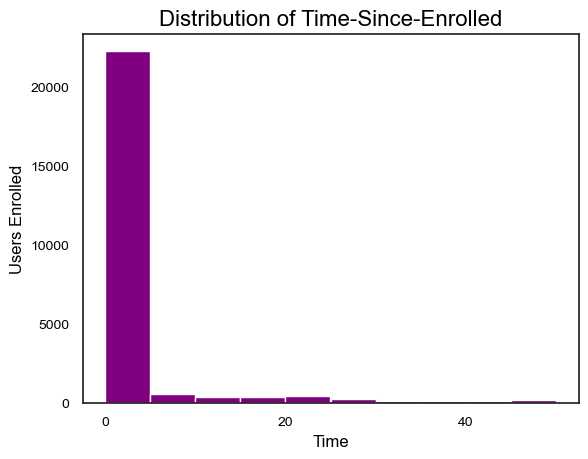

In [147]:
plt.hist(app_subscription_df["difference"].dropna(), color='purple', range =[0,50])
plt.title('Distribution of Time-Since-Enrolled',fontsize=16, color='black')
plt.xlabel('Time', fontsize=12, color='black')
plt.ylabel('Users Enrolled', fontsize=12, color='black')
# Change font and color of x and y tick labels
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
#plt.savefig('time_distribution_plot4.jpg')
plt.show()


Here we observe that most of users enrolled in 1st 1 Hour from registration
And We can conclude that most of users (more that 20000 out-off total 50000 users) do not used the 1st 24 hour premium free trial & infact they direcly jumped to the premium at the time of they 1st open the app

In [148]:
# Now we are updating the 'enrolled' column to 0 for rows where the 'difference' column has a value 
# greater than 48.So in this case business rule stating that if the time difference is greater than
# 48hours, the user is not considered enrolled.

In [149]:
app_subscription_df.loc[app_subscription_df.difference > 48, 'enrolled'] = 0

In [150]:
app_subscription_df = app_subscription_df.drop(columns=['enrolled_date', 'difference', 'first_open'])

In [151]:
app_subscription_df.head(10)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
5,56480,2,9,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,0
6,144649,1,2,35,"product_review,product_review2,ScanPreview",3,0,0,0,0
7,249366,1,3,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,0
8,372004,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,0,0
9,338013,4,18,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,0


## Formatting the screen_list Field

In [152]:
# Load Top Screens
top_screens = pd.read_csv("top_screens.csv").top_screens.values


In [153]:
top_screens.shape

(58,)

In [154]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

## Mapping Screens to Fields

In [155]:
app_subscription_df["screen_list"] = app_subscription_df.screen_list.astype(str) + ','

for sc in top_screens:
    app_subscription_df[sc] = app_subscription_df.screen_list.str.contains(sc).astype(int)
    app_subscription_df['screen_list'] = app_subscription_df.screen_list.str.replace(sc+",", "")



In [156]:
app_subscription_df['Other'] = app_subscription_df.screen_list.str.count(",")
app_subscription_df = app_subscription_df.drop(columns=['screen_list'])

## Funnels

Funnels are group of screens that belong to same set. There are many screens that are correlated with eachother, and we don''t want correlated screens coz it's not good idea for the model

In [157]:
 #(we will create the group of all screens that belong to the same set)

In [158]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9","Saving10"]
app_subscription_df["SavingCount"] = app_subscription_df[savings_screens].sum(axis=1)
app_subscription_df = app_subscription_df.drop(columns=savings_screens)

In [159]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
app_subscription_df["CMCount"] = app_subscription_df[cm_screens].sum(axis=1)
app_subscription_df = app_subscription_df.drop(columns=cm_screens)

In [160]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
app_subscription_df["CCCount"] = app_subscription_df[cc_screens].sum(axis=1)
app_subscription_df = app_subscription_df.drop(columns=cc_screens)

In [161]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
app_subscription_df["LoansCount"] = app_subscription_df[loan_screens].sum(axis=1)
app_subscription_df = app_subscription_df.drop(columns=loan_screens)

In [162]:
# Saving Results

In [163]:
app_subscription_df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,1


In [164]:
app_subscription_df.dtypes

user                       int64
dayofweek                  int64
hour                       int64
age                        int64
numscreens                 int64
minigame                   int64
used_premium_feature       int64
enrolled                   int64
liked                      int64
location                   int64
Institutions               int64
VerifyPhone                int64
BankVerification           int64
VerifyDateOfBirth          int64
ProfilePage                int64
VerifyCountry              int64
Cycle                      int64
idscreen                   int64
Splash                     int64
RewardsContainer           int64
EditProfile                int64
Finances                   int64
Alerts                     int64
Leaderboard                int64
VerifyMobile               int64
VerifyHousing              int64
RewardDetail               int64
VerifyHousingAmount        int64
ProfileMaritalStatus       int64
ProfileChildren            int64
ProfileEdu

In [165]:
app_subscription_df.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.495740,0.165000,0.517760,0.293660,0.524600,0.319540,0.473480,0.158040,0.423160,0.364860,0.340700,0.200760,0.084000,0.048980,0.076540,0.073720,0.051520,0.053860,0.045080,0.030920,0.041420,0.047560,0.0,0.0455,0.041060,0.024420,0.026220,0.023580,0.031760,0.022460,0.029800,0.021160,0.096560,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499987,0.371184,0.499689,0.455443,0.499399,0.466303,0.499301,0.364782,0.494065,0.481396,0.473949,0.400573,0.277391,0.215828,0.265863,0.261317,0.221058,0.225743,0.207482,0.173103,0.199262,0.212836,0.0,0.2084,0.198431,0.154351,0.159791,0.151738,0.175362,0.148176,0.170037,0.143919,0.295361,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23

In [166]:
# After dropping the screenlist from the dataset (which was grouped earlier) we will check the columns now. 

In [167]:
app_subscription_df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [168]:
# List of columns to be dropped
columns_to_drop = ['RewardsContainer', 'RewardDetail', 'Leaderboard', 'ResendToken', 'LoansCount', 'idscreen', 'Institutions', 'ProfileEducation', 'Cycle', 'WebView', 'ProfileEducationMajor', 'ProfileEmploymentLength']


In [169]:
# Drop the specified columns from the DataFrame
app_subscription_df = app_subscription_df.drop(columns=columns_to_drop, axis=1)

In [170]:
app_subscription_df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'VerifyPhone',
       'BankVerification', 'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry',
       'Splash', 'EditProfile', 'Finances', 'Alerts', 'VerifyMobile',
       'VerifyHousing', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login', 'SecurityModal',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingCount', 'CMCount', 'CCCount'],
      dtype='object')

In [171]:
app_subscription_df.shape

(50000, 38)

In [172]:
# Saving the above columns as dataset in to new CSV file and we will use it for Data Pre-Processing and Model Building
app_subscription_df.to_csv('new_appdata10.csv', index = False)

In [173]:
app_subscription_df = pd.read_csv('new_appdata10.csv')

In [174]:
app_subscription_df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Splash,EditProfile,Finances,Alerts,VerifyMobile,VerifyHousing,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,SecurityModal,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount
0,235136,3,2,23,15,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,7,0,0,0
1,333588,6,1,24,13,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0
2,254414,1,19,23,3,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,0,3,0
4,51549,1,18,31,32,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0


In [175]:
app_subscription_df.shape

(50000, 38)

## Data PreProcessing 

 Here we will drop the column 'enrolled" from the actual dataset

### Splitting Independent and Response Variables

In [176]:
response = app_subscription_df["enrolled"]
app_subscription_df = app_subscription_df.drop(columns="enrolled")

In [177]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(app_subscription_df, response,
                                                    test_size = 0.2,
                                                    random_state = 0)

### Balancing the Training Set

### Removing Identifiers

In [178]:
# we can not put user id in our model & also can not drop it as it is an identifier for each user, so let's keep it some where 
# as variable
train_identifier = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identifier = X_test['user']
X_test = X_test.drop(columns = ['user'])

### Feature Scaling

In [179]:
#We will scale the features using StandardScalar to avoid the dominance of perticular feature in entire model

In [180]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

### Model Building

In [181]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [182]:
# Predicting Test Set
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

### Evaluating Results

In [183]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)


0.762

In [184]:
precision_score(y_test, y_pred) # tp / (tp + fp)

0.754164158137668

In [185]:
recall_score(y_test, y_pred) # tp / (tp + fn)

0.7649094239772033

In [186]:
f1_score(y_test, y_pred)

0.759498787388844

### HeatMap Visualization of the confusion matrix using the Seaborn library('sn')

Test Data Accuracy: 0.7620


Text(62.25, 0.5, 'True Labels')

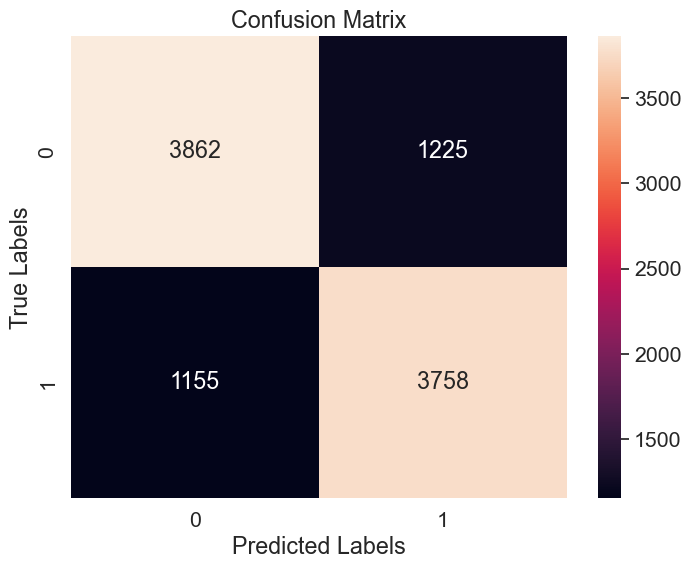

In [187]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (8,6))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

df_cm: a pandas dataframe created from confusion matrix 'cm'. it's indexed and labeled with the actual and predicted class labels


In [188]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      5087
           1       0.75      0.76      0.76      4913

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



### Applying k-Fold Cross Validation

In [189]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM: 0.764 (+/- 0.010)


### we got 77% accuracy and very less standard deviation which is 0.010 which tells us that the model is consistent and accurate

 we are applying k-Fold validation to assess the performance of the classifer using the 'cross_val_score'.
And we can get  more robust estimate of our model's performance by evaluating it on the training data
estimator = classifer : specifies the classifier(SVM in our case) that we want to evaluate.
X = X_train, y = y_train : the training data
cv = 10 : the number of folds for cross-validation (in this case, 10-fold)
10-fold cross-validation has become a standard practice in the machine learning community. It's often used as a default because it has been found to work well in practice for a wide range of datasets.

In [190]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(app_subscription_df.drop(columns = 'user').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,dayofweek,0.034111
1,hour,-0.014078
2,age,-0.172171
3,numscreens,-0.361919
4,minigame,0.006841
5,used_premium_feature,-0.118435
6,liked,0.008245
7,location,-0.018369
8,VerifyPhone,0.743895
9,BankVerification,0.117431


# Observations:
Positively Affecting features to enrollment: Other_sceens, VerifyPhone, CMCount, VerifyMobile, VerifyDateOfBirth, Rewards, EditProfile, etc, without any doubt all above features are situated to moving towards the enrollment screens.

Negatively Affecting features to enrollment: LoanCount, VerifyCountry, Alerts, age, numscreens, Login, ResendToken, etc, if we see all these features are irritating & no user want to do this.

# Hyperparameter Tuning

In [191]:
## Grid Search (Round 1)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC

In [192]:
# Select Regularization Method
penalty = ['l1', 'l2']

In [193]:
# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [194]:
# Combine Parameters
parameters = {'C': C, 'penalty': ['l2', 'none'], 'solver': ['lbfgs']}

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters


/Users/Preeya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Preeya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Preeya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Preeya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Preeya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Preeya/opt/anaconda3/lib/python3.9/sit

Took 17.57 seconds


(0.7638499999999999, {'C': 0.001, 'penalty': 'none', 'solver': 'lbfgs'})

In [195]:
## Grid Search (Round 2)

# Select Regularization Method
penalty = ['l1', 'l2']

In [196]:
# Create regularization hyperparameter space
C = [0.1, 0.5, 0.9, 1, 2, 5]

In [197]:
# Combine Parameters
parameters = {'C': C, 'penalty': ['l2', 'none'], 'solver': ['lbfgs']}

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters
grid_search.best_score_

/Users/Preeya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Preeya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Preeya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Preeya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Preeya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/Preeya/opt/anaconda3/lib/python3.9/sit

Took 11.17 seconds


0.7638499999999999

In [198]:
# Formatting Final Results
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()
final_results['predicted_results'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop=True)

In [199]:
final_results

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1


In [200]:
final_results.shape

(10000, 3)

In [201]:
# Count the occurrences of each value in 'enrolled'
enrolled_counts = final_results['enrolled'].value_counts()
enrolled_counts

0    5087
1    4913
Name: enrolled, dtype: int64

In [202]:
# Count the occurrences of each value in 'enrolled'
predicted_count = final_results['predicted_results'].value_counts()
predicted_count

0    5017
1    4983
Name: predicted_results, dtype: int64

In [203]:
# Saving the above columns as dataset in to new CSV file and we will use it for Data Pre-Processing and Model Building
final_results.to_csv('output.csv', index = False)

# Filter the Final Result

### Rows where 'enrolled' is 0 and predicted value is 1:

In [204]:
condition_1 = (final_results['enrolled'] == 0) & (final_results['predicted_results'] == 1)
enrolled_zero_predicted_one_results = final_results[condition_1]
print(enrolled_zero_predicted_one_results)

        user  enrolled  predicted_results
14    216038         0                  1
25    192801         0                  1
38    178087         0                  1
40     91037         0                  1
43    189180         0                  1
...      ...       ...                ...
9977  295129         0                  1
9979   37332         0                  1
9981  309967         0                  1
9984  284862         0                  1
9994  279449         0                  1

[1225 rows x 3 columns]


In [205]:
condition_2 = (final_results['enrolled'] == 0) & (final_results['predicted_results'] == 0)
enrolled_zero_predicted_zero_results = final_results[condition_1]
print(enrolled_zero_predicted_zero_results)

        user  enrolled  predicted_results
14    216038         0                  1
25    192801         0                  1
38    178087         0                  1
40     91037         0                  1
43    189180         0                  1
...      ...       ...                ...
9977  295129         0                  1
9979   37332         0                  1
9981  309967         0                  1
9984  284862         0                  1
9994  279449         0                  1

[1225 rows x 3 columns]


In [206]:
condition_3 = (final_results['enrolled'] == 1) & (final_results['predicted_results'] == 0)
enrolled_one_predicted_zero_results = final_results[condition_2]
print(enrolled_one_predicted_zero_results)

        user  enrolled  predicted_results
2      98290         0                  0
7     363062         0                  0
9      64484         0                  0
11    359940         0                  0
12    136089         0                  0
...      ...       ...                ...
9976  365937         0                  0
9982   14907         0                  0
9989  255074         0                  0
9990  347521         0                  0
9997  248318         0                  0

[3862 rows x 3 columns]


In [207]:
condition_4 = (final_results['enrolled'] == 1) & (final_results['predicted_results'] == 1)
enrolled_one_predicted_one_results = final_results[condition_2]
print(enrolled_one_predicted_one_results)

        user  enrolled  predicted_results
2      98290         0                  0
7     363062         0                  0
9      64484         0                  0
11    359940         0                  0
12    136089         0                  0
...      ...       ...                ...
9976  365937         0                  0
9982   14907         0                  0
9989  255074         0                  0
9990  347521         0                  0
9997  248318         0                  0

[3862 rows x 3 columns]


# Save the Machine Learning Models

In [208]:
# Assuming log_model is your logistic regression model
log_model = LogisticRegression()

In [209]:
# creating pickle files (saving the models)
with open("log_reg.pkl", "wb") as li:  # wb: mode write
    pickle.dump(log_model, li)

# Random Forest Model

In [210]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier

RandomForestClassifier(random_state=0)

In [211]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [212]:
# Make predictions
rf_y_pred = rf_classifier.predict(X_test)
rf_y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [213]:
# Evaluate the performance
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_accuracy

0.7741

In [214]:
precision_score(y_test, y_pred) # tp / (tp + fp)

0.754164158137668

In [215]:
recall_score(y_test, y_pred) # tp / (tp + fn)

0.7649094239772033

In [216]:
f1_score(y_test, y_pred)

0.759498787388844

# XGBoost Classifier

In [217]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.7838

In [218]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb

array([1, 1, 0, ..., 0, 1, 0])

In [219]:
accuracy_score(y_test, y_pred_xgb)

0.7838

In [220]:
precision_score(y_test, y_pred) # tp / (tp + fp)

0.754164158137668

In [221]:
recall_score(y_test, y_pred) # tp / (tp + fn)

0.7649094239772033

In [222]:
f1_score(y_test, y_pred)

0.759498787388844

# Model Building

In [223]:
#Fitting model to the training set
#Create an instance of the XGBClassifier
xgb_model = XGBClassifier()

In [224]:
# Fit the model to the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [225]:
# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb

array([1, 1, 0, ..., 0, 1, 0])

In [226]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_xgb)
accuracy

0.7838

# Confusion Matrix

In [227]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Calculate additional evaluation metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)


In [228]:
# Print the evaluation metrics
print("Confusion Matrix:")
print(cm)
print("\nAccuracy Score:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Confusion Matrix:
[[4190  897]
 [1265 3648]]

Accuracy Score: 0.7838
F1 Score: 0.7714104461831254
Precision: 0.8026402640264027
Recall: 0.7425198453083656


# Heatmap visualisation of the Confusion Matrix using seaborn library

Test Data Accuracy: 0.7620


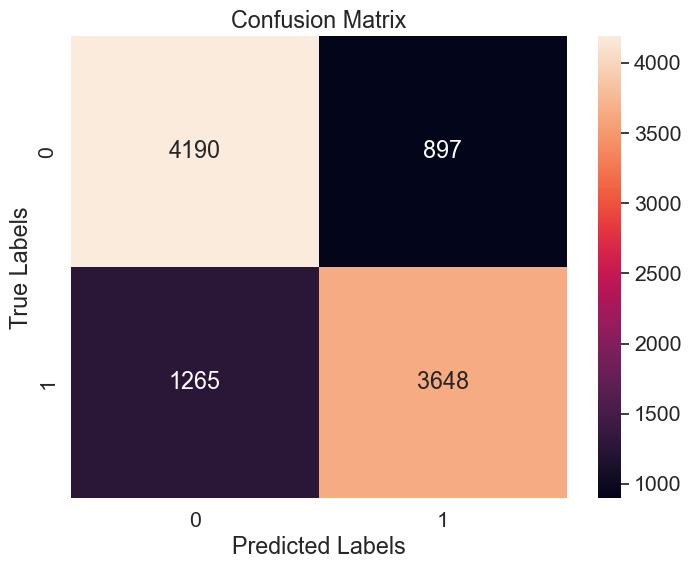

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Adjust font size
sns.heatmap(cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [230]:
from sklearn.metrics import classification_report
# Print the classification report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      5087
           1       0.80      0.74      0.77      4913

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



# Apply K-Fold cross Validation

In [231]:
from sklearn.model_selection import cross_val_score

# Define your XGBoost classifier
xgb_model = XGBClassifier()

# Perform k-fold cross-validation
accuracies = cross_val_score(estimator=xgb_model, X=X_train, y=y_train, cv=10)

# Print the mean and standard deviation of the accuracies
print("Mean accuracy:", accuracies.mean())
print("Standard deviation of accuracies:", accuracies.std())


Mean accuracy: 0.7765000000000001
Standard deviation of accuracies: 0.007256031973468696


This will perform k-fold cross-validation with 10 folds and print the mean accuracy along with the standard deviation of accuracies across the folds. Adjust the parameters as needed, such as the number of folds or the scoring metric.

## Analyzing the coefficients

In [232]:
# Analyzing Coefficients
#pd.concat([pd.DataFrame(app_subscription_df.drop(columns = 'user').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(xgb_model.coef_), columns = ["coef"])
           ],axis = 1)


IndentationError: unexpected indent (1416813166.py, line 3)

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create an instance of the XGBoost classifier
xgb_model = XGBClassifier()

# Define the cross-validation strategy
cv = 10  # 10-fold cross-validation

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2)

# Fit the grid search object
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)

print("Best parameters:", best_params)
print("Test accuracy:", test_accuracy)


Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}

Test accuracy: 0.7862

# Format the Final results

In [233]:

# Create a DataFrame for final results
final_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})

# Add additional columns if needed
final_results['Correct'] = final_results['Actual'] == final_results['Predicted']

# Display the formatted results
print(final_results)


       Actual  Predicted  Correct
11841       1          1     True
19602       1          1     True
45519       0          0     True
25747       1          1     True
42642       1          0    False
...       ...        ...      ...
25091       1          1     True
27853       1          1     True
47278       0          0     True
37020       1          1     True
2217        1          0    False

[10000 rows x 3 columns]
